(42, 12)
.


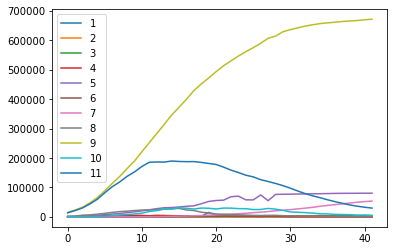

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
df = pd.read_excel('数模数据.xlsx')

array1 = df.values
print(array1.shape)


# fonts = matplotlib.font_manager.FontProperties(fname='/home/prefer/Fonts/simhei.ttf', size=23)
print(matplotlib.Path())
array1 = df.values
# print(array1.shape)
X = np.array(range(42))
# print(X)
for i in range(11):
    plt.plot(X, array1[:,i+1],label=str(i+1))

plt.legend()#prop=fonts
plt.show()

In [2]:
1.4e9

1400000000.0

In [3]:
array1[0,5]

1287

In [4]:
e0 = float(array1[0,8])

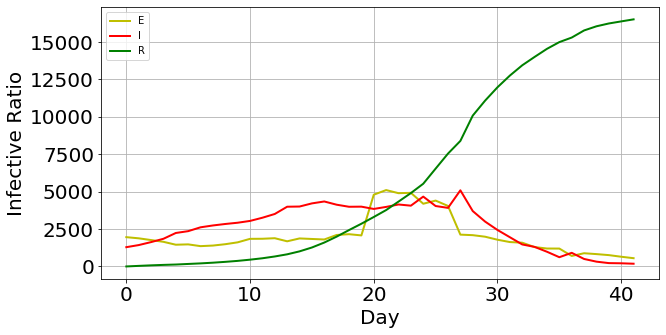

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('数模数据.xlsx')

array1 = df.values

#population

N=1.9e8+1287+38 # 城市人口总数=易感人群+初始感染+初始移出者

# simuation Time / Day
T =42 #时间

# susceptiable ratio
s = np.zeros([T])
# exposed ratio
e = np.zeros([T])
# infective ratio
i = np.zeros([T])
# remove ratio
r = np.zeros([T])
# contact rate
lamda = 0.5 # 每天传染的概率
# recover rate
gamma = 0.0821 # 治愈率参照非典
# exposed period
sigma =1/4 # 潜伏期的倒数
sigmas = 1/(np.random.poisson(7,size=(T)))# 假设满足柏松分布

# lamdas
list1=[5690]#24前一天9507新增
for m in range(41):
    #print(array1[:,9][i])
    p = array1[:,9][m+1]-array1[:,9][m]
    list1.append(p)

    
lamdas = array1[:,1]/list1

gammas = array1[:,7]/array1[:,5]

# i0 = float(array1[0,5])
# e0 = float(array1[0,8])
# initial infective people

i[0] = 1287.0 / N
s[0] = 1.9e8 / N
e[0] = 1956.0 / N

for t in range(T-1):
    s[t+1]=s[t]-lamdas[t]*s[t]*i[t]
    e[t+1]=e[t]+lamdas[t]*s[t]*i[t]-sigmas[t]*e[t]
    i[t+1]=i[t]+sigmas[t]*e[t]-gammas[t]*i[t]
    r[t+1]=r[t]+gammas[t]*i[t]

    
    
# plot    
fig, ax = plt.subplots(figsize=(10, 5)) 
# ax.plot(s*1.9e8, c='b', lw=2,label='S')# 易感者
ax.plot(e*1.9e8, c='y', lw=2,label='E')# 潜伏者
ax.plot(i*1.9e8, c='r', lw=2,label='I')# 感染者
ax.plot(r*1.9e8, c='g', lw=2,label='R')# 移出者
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20) 
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

In [43]:
sigmas = 1/(np.random.poisson(7,size=(T)))# 柏松分布
sigmas[0]

0.2

In [7]:
lamdas.shape

(42,)

In [8]:
s.shape

(42,)

In [9]:
type(i)

numpy.ndarray

In [10]:
sigmas

array([0.14285714, 0.14285714, 0.07692308, 0.125     , 0.5       ,
       0.16666667, 0.16666667, 0.14285714, 0.125     , 0.25      ,
       0.07692308, 0.16666667, 0.125     , 0.16666667, 0.2       ,
       0.2       , 0.11111111, 0.16666667, 0.2       , 0.1       ,
       0.2       , 0.14285714, 0.16666667, 0.125     , 0.16666667,
       0.16666667, 0.14285714, 0.14285714, 0.125     , 0.25      ,
       0.14285714, 0.16666667, 0.08333333, 0.14285714, 0.11111111,
       0.1       , 0.125     , 0.11111111, 0.16666667, 0.07142857,
       0.09090909, 0.125     ])

In [11]:
type(lamdas[0])

float

In [12]:
s

array([0.99986752, 0.99985748, 0.999845  , 0.99983156, 0.9998023 ,
       0.99978071, 0.99975856, 0.99973283, 0.99970323, 0.9996707 ,
       0.99961953, 0.99958282, 0.9995346 , 0.99948737, 0.99944483,
       0.99939807, 0.99935402, 0.99930584, 0.99926967, 0.99923231,
       0.99892826, 0.99883541, 0.99877309, 0.99869298, 0.99861663,
       0.99854689, 0.99848707, 0.99847623, 0.99845677, 0.9984405 ,
       0.99842839, 0.99841482, 0.9983988 , 0.99838681, 0.99837544,
       0.99836676, 0.99835204, 0.99832892, 0.99832285, 0.99831934,
       0.99831645, 0.99831431])

$$
\begin{aligned}
&\frac{d s}{d t}=-\beta S \frac{I}{N}\\
&\frac{d e}{d t}=\beta S \frac{I}{N}-k E\\
&\frac{d I}{d t}=k E-(\gamma+\mu) I\\
&\frac{R}{d t}=\gamma I
\end{aligned}
$$

$R_{0}$ 基础再传播人数

$\tau$ 传染概率，一名易感者和一名感染者接触时被感染的概率

$\bar{c}$ 单位时间内和感染者接触的易感人员的平均比例值

d 感染暴露时长

S 易感人群

I 感染人群

R 移除人群，是指，被隔离或治愈而消除影响的感染人群

E 暴露人群, 处于潜伏期


$R_{0}=\tau \cdot \bar{c} \cdot d$(再传播人数=传染率⋅接触易感人数的平均值⋅感染暴露时长)


N，以武汉为中心的辐射人口：19 000 000

μ, 患病死亡率：0.02。

$I_0$ ，期初患病人数：1。

$\frac{\beta}{\gamma} 2.68$


$\beta=\tau \bar{c}$  表示有效接触率

In [24]:
lamdas

array([0.07803163444639719, 0.08355598736944377, 0.08208795900939368,
       0.11779965411733405, 0.08241075463172165, 0.07501295560545863,
       0.07964317286827935, 0.08979835953520164, 0.09643668317384667,
       0.14876257818874083, 0.10292059048103844, 0.12482738687819134,
       0.12048664339998043, 0.10068877142399488, 0.10800762631077217,
       0.10057939182792441, 0.11101442970052933, 0.0855928983454803,
       0.08751737317581654, 0.7549952663311575, 0.2363484398216939,
       0.131288526546033, 0.1237449953803511, 0.12338836004337872,
       0.12670473631172322, 0.12939261670489013, 0.026720922346558155,
       0.05268460353206116, 0.05274345688853461, 0.043335785461111484,
       0.05831194753350442, 0.0817903719207857, 0.07168079096045198,
       0.09081375838926174, 0.08427835051546392, 0.1685748124753257,
       0.26914044152184124, 0.08003169572107766, 0.0753465943339361,
       0.0794392523364486, 0.05289193302891933, 0.07818480043739748],
      dtype=object)

In [54]:
10/1e7

1e-06

### R代码

```R
library(deSolve) 
library(ggplot2)

sir <- function(time, state, pars) {
  with(as.list(c(state, pars)), {
    dS <- -beta * S * I/N
    dI <- beta * S * I/N - gamma * I
    dR <- gamma * I
    return(list(c(dS, dI, dR)))
  })
}


N <- 1.9e8 # 总人口
I0 <- 1 # 初始感染者数量
RM0 <- 0 # 初始移除人员数量
S0 <- N - I0 - RM0 # 初始易感人群数量
init <- c(S = S0, I = I0, R = RM0) # 初始值
# 以下参数在模型假定下是常量
pars <- c(
  beta = 0.55, # 有效接触率
  gamma = 0.2, # 移除率
  N = N # 人口
  ) 
# 迭代次数，以天计
times <- seq(0, 150, by = 1) 

res <- as.data.frame(ode(y = init, times = times, func = sir, parms = pars))

ggplot(res) +
  geom_line(aes(x = time, y = S, col = '易感'))+
  geom_line(aes(x = time, y = I, col = '感染'))+
  geom_line(aes(x = time, y = R, col = '移除'))+
  theme_light(base_family = 'Kai') +
  scale_colour_manual("",
  values=c("易感" = "cornflowerblue", "感染" = "darkred", "移除" = "forestgreen")
  ) +
  scale_y_continuous('')



```